In [7]:
%matplotlib inline 
import PIL as PIL

import numpy as np
import matplotlib.pyplot as plt

import io
from scipy.ndimage import gaussian_filter
from skimage import filters
from skimage import data,exposure,color,restoration
from skimage.morphology import disk
from skimage.filters.rank import median
im4 = PIL.Image.open('input4.bmp')
im4 = np.asarray(im4)
plt.rcParams["figure.figsize"] = [16,9]

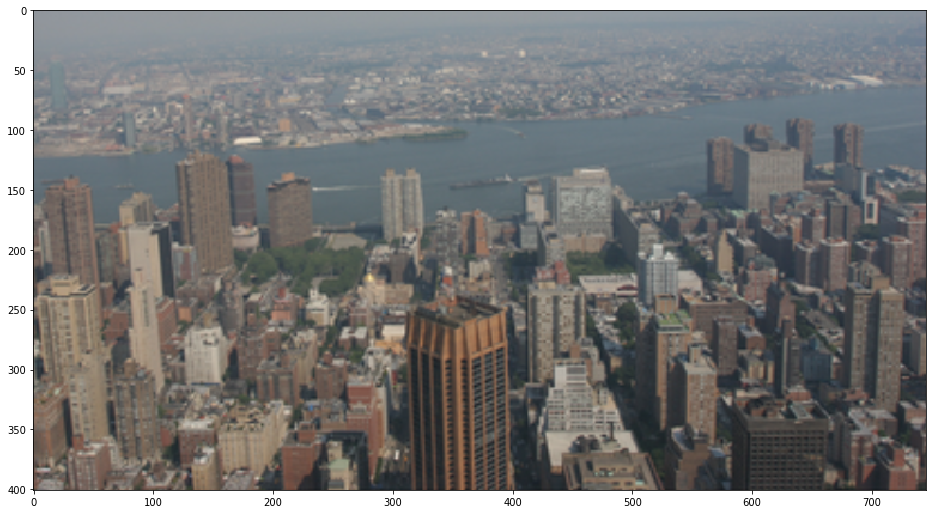

In [2]:
plt.imshow(im4)
plt.show()

In [3]:
def darkchannl(image,windowsize=(11,11)):
    White = [255,255,255]
    padwidth = windowsize[0]//2
    image_pad = cv2.copyMakeBorder(image,padwidth,padwidth,padwidth,padwidth,cv2.BORDER_CONSTANT,value=White)
    J_dark = np.zeros((image.shape[0],image.shape[1]))
    min_RGB = np.amin(image_pad,axis=2)
    for i in range(J_dark.shape[0]):
        for j in range(J_dark.shape[1]):
            J_dark[i][j] = np.min(min_RGB[i:i+windowsize[0],j:j+windowsize[1]].flatten())
    return J_dark
    plt.imshow(J_dark)
    plt.gray()
    plt.show()
def atmosphere(image, image_dark,ratio):
    image = image.reshape([-1, 3])
    image_dark = image_dark.flatten()
    top_k_index = np.argsort(image_dark)[-int(image_dark.size * ratio):]
    return np.mean(np.take(image, top_k_index, axis=0), axis=0)
def transmission(image,A,omaga):
    return 1.0-omaga*darkchannl(image/A)

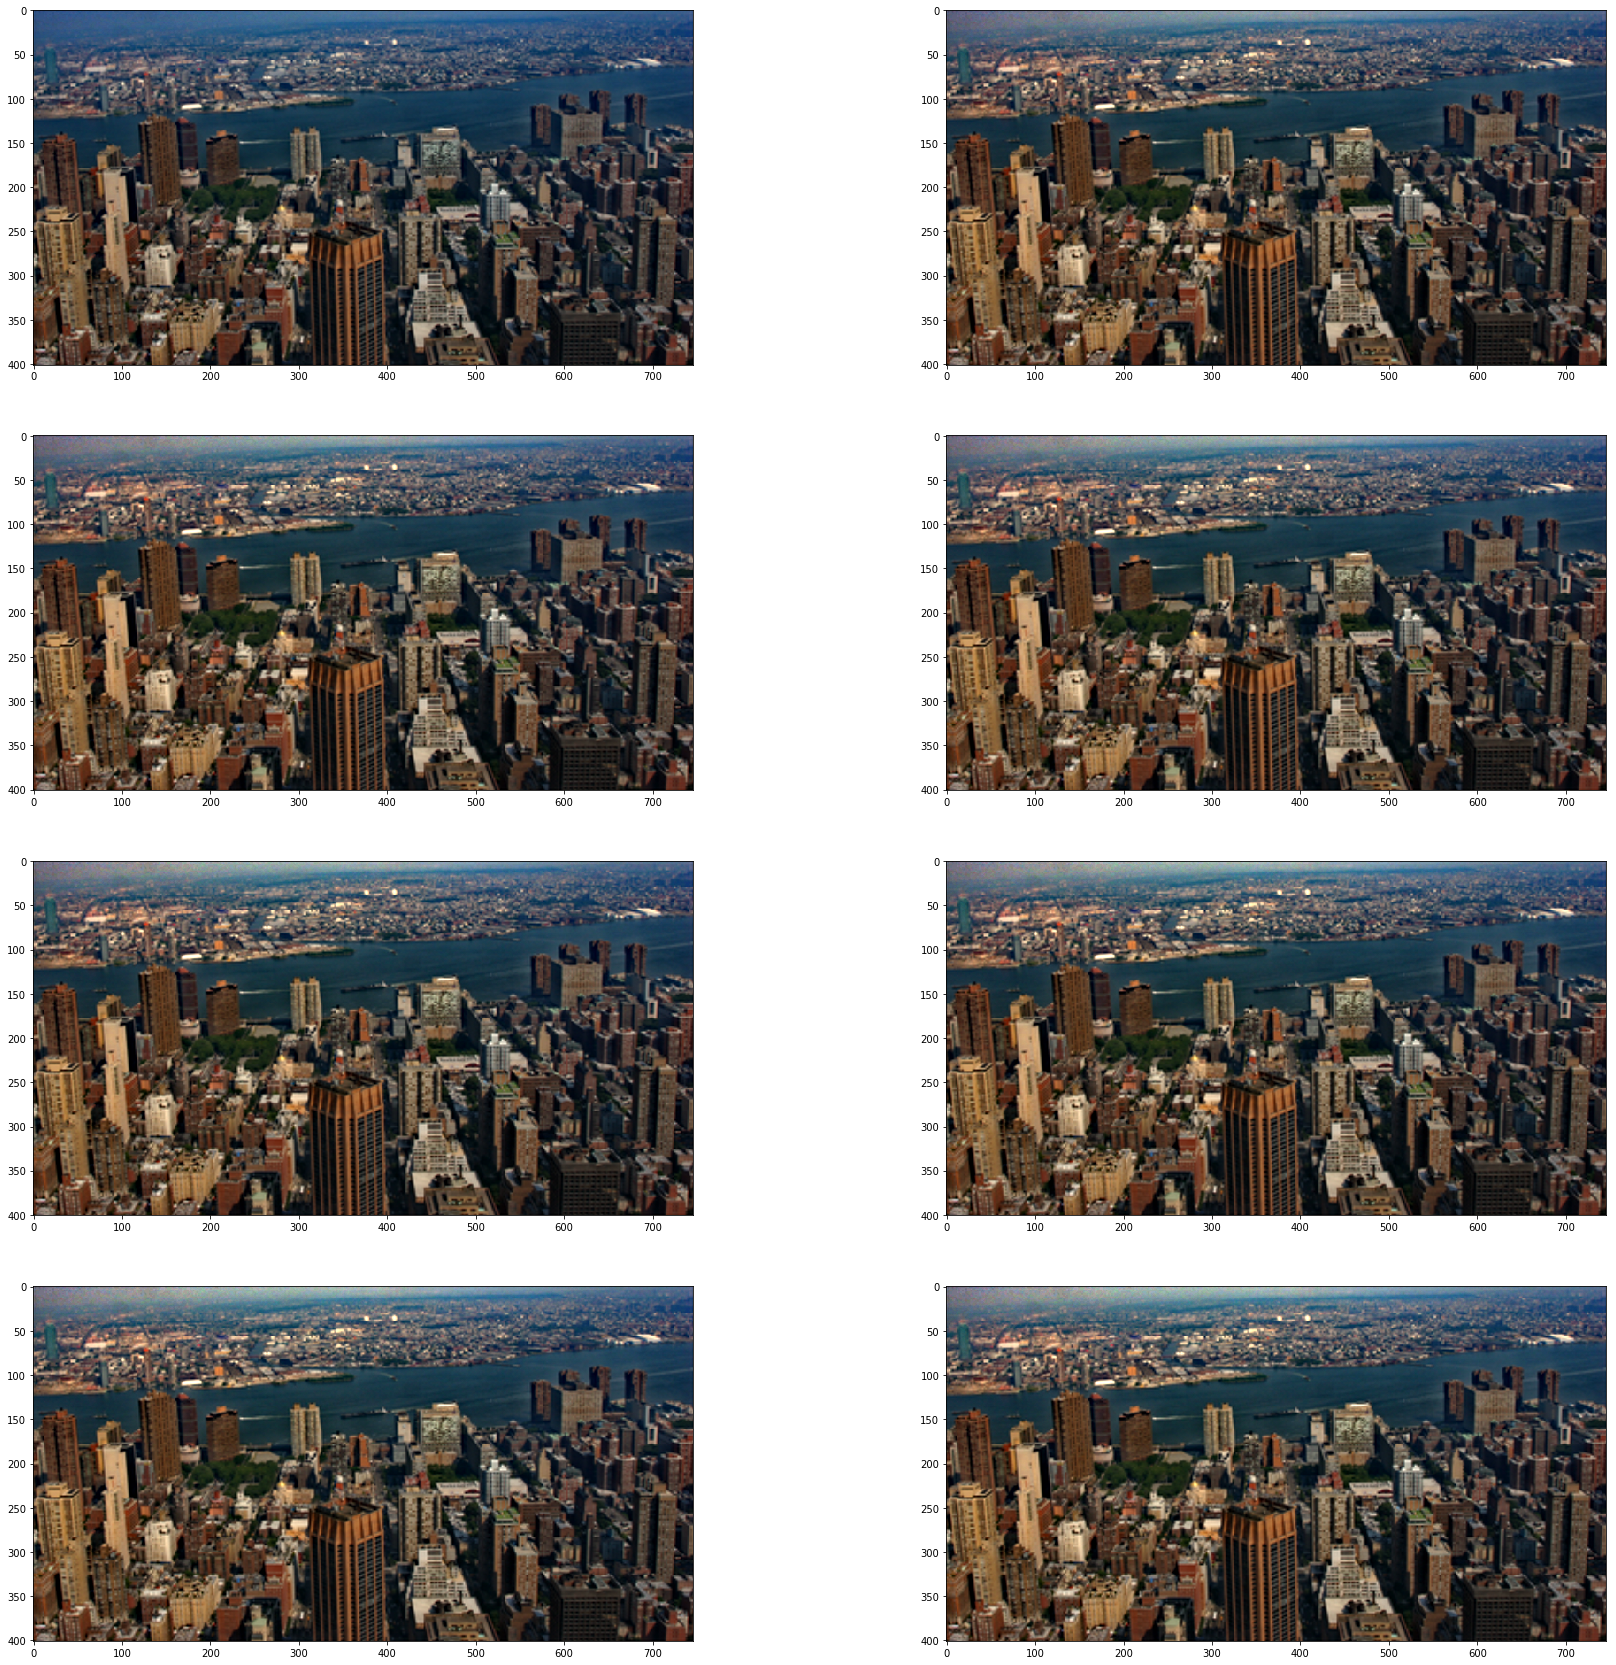

In [28]:
f,ax = plt.subplots(4,2,figsize=(30, 30))

for i in range(8):
    image_dark = darkchannl(im4,(3+4*i,3+4*i))
    A = atmosphere(im4,image_dark,0.01)
    t = transmission(im4,A.astype(np.float32),0.95)
    t = gaussian_filter(t, sigma=10)
    T = np.dstack([t,t,t])

    dehaze_im = (im4.astype(np.int)-A.astype(np.float32))/T+A
    dehaze_im[dehaze_im<0] = 0
    dehaze_im[dehaze_im>255] = 255
    ax[i//2][i%2].imshow(dehaze_im.astype(np.uint8))
    o = PIL.Image.fromarray(dehaze_im.astype(np.uint8))
    o.save('windows'+str(i)+'.jpg')
f.show()

In [1]:
image_dark = darkchannl(im4,(7,7))
A = atmosphere(im4,image_dark,0.01)
t = transmission(im4,A.astype(np.float32),0.95)
t = gaussian_filter(t, sigma=10)

T = np.dstack([t,t,t])
dehaze_im = (im4.astype(np.int)-A.astype(np.float32))/T+A
dehaze_im[dehaze_im<0] = 0
dehaze_im[dehaze_im>255] = 255
dehaze_im = dehaze_im.astype(np.uint8)
dehaze_im_hsv = color.rgb2hsv(dehaze_im)

# 降低飽和度
dehaze_im_hsv[:,:,1] *= 0.8
dehaze_im = color.hsv2rgb(dehaze_im_hsv)*255.0
dehaze_im = dehaze_im.astype(np.uint8)
output = PIL.Image.fromarray(dehaze_im)
output.save('output4.bmp')
plt.imshow(dehaze_im)
plt.show()

NameError: name 'darkchannl' is not defined

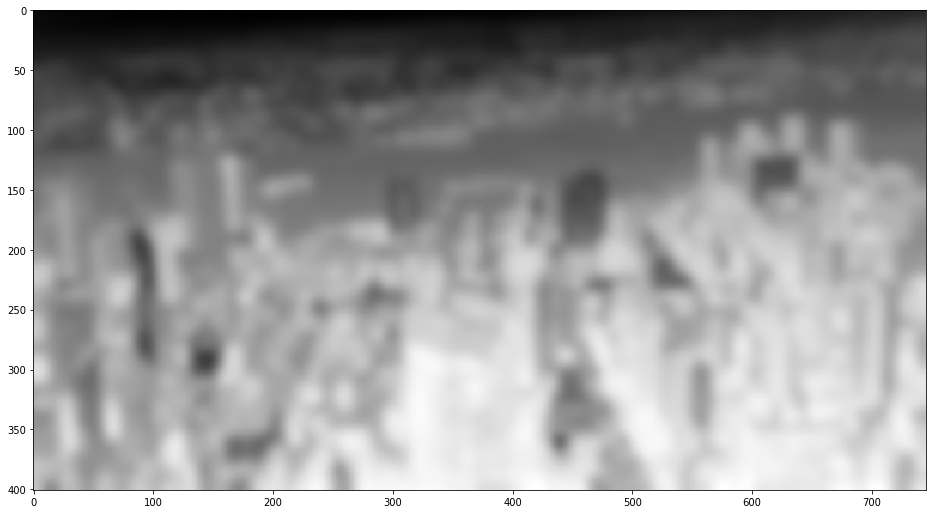

NameError: name 'T1' is not defined

In [14]:
plt.imshow(t)
plt.show()
T1.shape